# Data Cleanup

In [1]:
import csv
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import numpy as np

checkout_data = pd.read_csv('data/Checkouts_By_Title_Data_Lens_2017.csv')
checkout_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034542 entries, 0 to 5034541
Data columns (total 6 columns):
BibNumber           5034542 non-null int64
ItemBarcode         5034542 non-null int64
ItemType            5034542 non-null object
Collection          5034542 non-null object
CallNumber          5034464 non-null object
CheckoutDateTime    5034542 non-null object
dtypes: int64(2), object(4)
memory usage: 230.5+ MB


In [2]:
checkout_data.head()

,BibNumber,ItemBarcode,ItemType,Collection,CallNumber,CheckoutDateTime
0,2543647,10063298235,accd,nacd,CD 782.42166 C6606So,01/02/2017 08:13:00 AM
1,3172300,10087522552,acbk,namys,MYSTERY COTTERI 2016,01/02/2017 08:13:00 AM
2,2393405,10054483200,acbk,camys,MYSTERY MAY2006,01/02/2017 08:24:00 AM
3,3199718,10088153514,acdvd,nadvdnf,DVD 781.66092 M3347G 2013,01/02/2017 08:33:00 AM
4,3211526,10089643810,accd,nacd,CD 782.42166 Sh75o,01/02/2017 08:33:00 AM


In [3]:
checkout_data.drop(['ItemBarcode', 'CallNumber','ItemType', 'Collection'], axis=1, inplace=True)
checkout_data.head()

,BibNumber,CheckoutDateTime
0,2543647,01/02/2017 08:13:00 AM
1,3172300,01/02/2017 08:13:00 AM
2,2393405,01/02/2017 08:24:00 AM
3,3199718,01/02/2017 08:33:00 AM
4,3211526,01/02/2017 08:33:00 AM


In [4]:
checkout_data['Checked_out'] = 1
checkout_data.head()

,BibNumber,CheckoutDateTime,Checked_out
0,2543647,01/02/2017 08:13:00 AM,1
1,3172300,01/02/2017 08:13:00 AM,1
2,2393405,01/02/2017 08:24:00 AM,1
3,3199718,01/02/2017 08:33:00 AM,1
4,3211526,01/02/2017 08:33:00 AM,1


In [5]:
checkout_data[pd.isnull(checkout_data).any(axis=1)]

,BibNumber,CheckoutDateTime,Checked_out


In [6]:
inventory = pd.read_csv('data/Library_Collection_Inventory.csv')
inventory.head()

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,09/01/2017,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,09/01/2017,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,09/01/2017,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,09/01/2017,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,09/01/2017,1


In [7]:
inventory = inventory.rename(columns={"BibNum": "BibNumber"})
inventory

,BibNumber,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,09/01/2017,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,09/01/2017,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,09/01/2017,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,09/01/2017,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,09/01/2017,1
5,1736505,Children of Cambodia's killing fields : memoir...,NaN,"0300068395, 0300078730",c1997.,"Yale University Press,","Political atrocities Cambodia, Children Cambod...",acbk,canf,NaN,cen,09/01/2017,1
6,1749492,Anti-Zionism : analytical reflections / editor...,NaN,091559773X,c1989.,"Amana Books,","Berger Elmer 1908 1996, Zionism Controversial ...",acbk,canf,NaN,cen,09/01/2017,1
7,3270562,Hard-hearted Highlander / Julia London.,"London, Julia","0373789998, 037380394X, 9780373789993, 9780373...",[2017],"HQN,","Man woman relationships Fiction, Betrothal Fic...",acbk,nanew,NaN,lcy,09/01/2017,1
8,3264577,The Sandcastle Empire / Kayla Olson.,"Olson, Kayla","0062484877, 9780062484871",2017.,"HarperTeen,","Survival Juvenile fiction, Islands Juvenile fi...",acbk,nynew,NaN,nga,09/01/2017,1
9,3236819,Doctor Who. The return of Doctor Mysterio / BB...,NaN,NaN,[2017],"BBC Worldwide,","Doctor Fictitious character Drama, Time travel...",acdvd,nadvd,Floating,wts,09/01/2017,2


In [8]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687149 entries, 0 to 2687148
Data columns (total 13 columns):
BibNumber          int64
Title              object
Author             object
ISBN               object
PublicationYear    object
Publisher          object
Subjects           object
ItemType           object
ItemCollection     object
FloatingItem       object
ItemLocation       object
ReportDate         object
ItemCount          int64
dtypes: int64(2), object(11)
memory usage: 266.5+ MB


In [9]:
inventory.drop(['ISBN', 'FloatingItem', 'ItemLocation','ReportDate'], axis=1, inplace=True)

In [10]:
combined_inv = inventory.groupby(['BibNumber', 'Title', 'Author', 'PublicationYear', 'Publisher', 'Subjects', 'ItemType', 'ItemCollection'], as_index=False)['ItemCount'].sum()

In [11]:
combined_inv.head()

,BibNumber,Title,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemCount
0,4,Erotic art of the East; the sexual theme in or...,"Rawson, Philip S.",[1968],"Putnam,","Erotic art East Asia, Art Asian",arbk,cs8r,2
1,7,"Birdless summer; China: autobiography, history.","Han, Suyin, 1917-2012",[1968],"Putnam,","Han Suyin 1917 2012, Authors Chinese 20th cent...",acbk,cab,2
2,12,Combat aircraft of the world; from 1909 to the...,"Taylor, John W. R. (John William Ransom), 1922...",[1969],Putnam,Airplanes Military,arbk,caaero,2
3,21,Stained glass in French cathedrals. [Translate...,"Witzleben, Elisabeth von, 1905-",[1968],Reynal,Glass painting and staining France,arbk,cs8r,2
4,24,The history & folklore of American country tin...,"Coffin, Margaret",[1968],T. Nelson,"Tinware United States, Tinsmiths United States...",acbk,canf,2


In [12]:
merged = combined_inv.join(checkout_data.set_index('BibNumber'), on='BibNumber')
merged.head(10)

,BibNumber,Title,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemCount,CheckoutDateTime,Checked_out
0,4,Erotic art of the East; the sexual theme in or...,"Rawson, Philip S.",[1968],"Putnam,","Erotic art East Asia, Art Asian",arbk,cs8r,2,NaN,NaN
1,7,"Birdless summer; China: autobiography, history.","Han, Suyin, 1917-2012",[1968],"Putnam,","Han Suyin 1917 2012, Authors Chinese 20th cent...",acbk,cab,2,NaN,NaN
2,12,Combat aircraft of the world; from 1909 to the...,"Taylor, John W. R. (John William Ransom), 1922...",[1969],Putnam,Airplanes Military,arbk,caaero,2,NaN,NaN
3,21,Stained glass in French cathedrals. [Translate...,"Witzleben, Elisabeth von, 1905-",[1968],Reynal,Glass painting and staining France,arbk,cs8r,2,NaN,NaN
4,24,The history & folklore of American country tin...,"Coffin, Margaret",[1968],T. Nelson,"Tinware United States, Tinsmiths United States...",acbk,canf,2,NaN,NaN
5,25,Sulphides; the art of cameo incrustation.,"Jokelson, Paul, 1905-2002",[1968],Nelson,Sulphides Art,acbk,canf,2,NaN,NaN
6,33,Selected poems. [Translated by] Kenneth Rexroth.,"Reverdy, Pierre, 1889-1960",[1969],"[New Directions],",Reverdy Pierre 1889 1960 Translations into Eng...,acbk,canf,2,01/03/2017 01:27:00 PM,1.0
6,33,Selected poems. [Translated by] Kenneth Rexroth.,"Reverdy, Pierre, 1889-1960",[1969],"[New Directions],",Reverdy Pierre 1889 1960 Translations into Eng...,acbk,canf,2,07/25/2017 02:43:00 PM,1.0
6,33,Selected poems. [Translated by] Kenneth Rexroth.,"Reverdy, Pierre, 1889-1960",[1969],"[New Directions],",Reverdy Pierre 1889 1960 Translations into Eng...,acbk,canf,2,10/04/2017 08:59:00 AM,1.0
7,35,"Tectonic, plutonic, and metamorphic history of...","Crosby, Percy.",1968.,"Geological Society of America,",Geology British Columbia Kootenay Lake Region,arbk,cs7r,2,NaN,NaN


In [13]:
merged.drop('BibNumber', axis=1, inplace=True)

In [14]:
merged.drop('CheckoutDateTime', axis=1, inplace=True)


In [15]:
merged['Checked_out'].fillna(0, inplace=True)
merged.head()

,Title,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemCount,Checked_out
0,Erotic art of the East; the sexual theme in or...,"Rawson, Philip S.",[1968],"Putnam,","Erotic art East Asia, Art Asian",arbk,cs8r,2,0.0
1,"Birdless summer; China: autobiography, history.","Han, Suyin, 1917-2012",[1968],"Putnam,","Han Suyin 1917 2012, Authors Chinese 20th cent...",acbk,cab,2,0.0
2,Combat aircraft of the world; from 1909 to the...,"Taylor, John W. R. (John William Ransom), 1922...",[1969],Putnam,Airplanes Military,arbk,caaero,2,0.0
3,Stained glass in French cathedrals. [Translate...,"Witzleben, Elisabeth von, 1905-",[1968],Reynal,Glass painting and staining France,arbk,cs8r,2,0.0
4,The history & folklore of American country tin...,"Coffin, Margaret",[1968],T. Nelson,"Tinware United States, Tinsmiths United States...",acbk,canf,2,0.0


In [16]:
import re

merged['PublicationYear'] = merged['PublicationYear'].str.extract('(\d\d\d\d)', expand=True)
merged['PublicationYear'] = pd.to_numeric(merged['PublicationYear'])
merged.loc[merged.PublicationYear > 2017, 'PublicationYear'] = None
discard_inv = merged[pd.isnull(merged).any(axis=1)]
clean_data = pd.concat([merged, discard_inv, discard_inv]).drop_duplicates(keep=False)

In [17]:
clean_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286725 entries, 0 to 657213
Data columns (total 9 columns):
Title              286725 non-null object
Author             286725 non-null object
PublicationYear    286725 non-null float64
Publisher          286725 non-null object
Subjects           286725 non-null object
ItemType           286725 non-null object
ItemCollection     286725 non-null object
ItemCount          286725 non-null int64
Checked_out        286725 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 21.9+ MB


In [18]:
clean_data['PublicationYear'] = pd.to_numeric(clean_data['PublicationYear'], downcast='integer')
clean_data.reset_index(drop=True)
clean_data.head()

,Title,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemCount,Checked_out
0,Erotic art of the East; the sexual theme in or...,"Rawson, Philip S.",1968,"Putnam,","Erotic art East Asia, Art Asian",arbk,cs8r,2,0.0
1,"Birdless summer; China: autobiography, history.","Han, Suyin, 1917-2012",1968,"Putnam,","Han Suyin 1917 2012, Authors Chinese 20th cent...",acbk,cab,2,0.0
2,Combat aircraft of the world; from 1909 to the...,"Taylor, John W. R. (John William Ransom), 1922...",1969,Putnam,Airplanes Military,arbk,caaero,2,0.0
3,Stained glass in French cathedrals. [Translate...,"Witzleben, Elisabeth von, 1905-",1968,Reynal,Glass painting and staining France,arbk,cs8r,2,0.0
4,The history & folklore of American country tin...,"Coffin, Margaret",1968,T. Nelson,"Tinware United States, Tinsmiths United States...",acbk,canf,2,0.0


In [19]:
item_data = pd.read_csv('data/Integrated_Library_System__ILS__Data_Dictionary.csv')
item_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Code                 555 non-null object
Description          555 non-null object
Code Type            555 non-null object
Format Group         526 non-null object
Format Subgroup      477 non-null object
Category Group       258 non-null object
Category Subgroup    36 non-null object
dtypes: object(7)
memory usage: 30.4+ KB


In [20]:
item_types = item_data.loc[item_data['Code Type'] == 'ItemType']
item_collection = item_data.loc[item_data['Code Type'] == 'ItemCollection']

In [21]:
item_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 499
Data columns (total 7 columns):
Code                 107 non-null object
Description          107 non-null object
Code Type            107 non-null object
Format Group         106 non-null object
Format Subgroup      84 non-null object
Category Group       36 non-null object
Category Subgroup    0 non-null object
dtypes: object(7)
memory usage: 6.7+ KB


In [22]:
item_types.head()

,Code,Description,Code Type,Format Group,Format Subgroup,Category Group,Category Subgroup
0,pkbknh,Peak Picks Book,ItemType,NaN,NaN,NaN,NaN
1,acart,Framed Art: Adult/YA,ItemType,Media,Art,NaN,NaN
2,acbk,Book: Adult/YA,ItemType,Print,Book,NaN,NaN
3,accas,Audio Tape: Adult/YA,ItemType,Media,Audio Tape,NaN,NaN
4,accd,CD: Adult/YA,ItemType,Media,Audio Disc,NaN,NaN


In [23]:
item_collection.head()

,Code,Description,Code Type,Format Group,Format Subgroup,Category Group,Category Subgroup
38,cabob,CA-Books on Bikes,ItemCollection,Print,Book,NaN,NaN
39,cacd,CA8-Music CD,ItemCollection,Media,Audio Disc,NaN,NaN
40,cadocmf,CA6-Microform - Documents,ItemCollection,Media,Document,NaN,NaN
41,cadocpt,CA6-Poster - DOC,ItemCollection,Media,Document,NaN,NaN
42,caesl,CA1-ESL,ItemCollection,Print,Book,NaN,NaN


In [24]:
clean_data['ItemType'].head()

0    arbk
1    acbk
2    arbk
3    arbk
4    acbk
Name: ItemType, dtype: object

In [25]:
clean_data['ItemType'] = clean_data['ItemType'].map(item_types.set_index('Code')['Description'])
clean_data['ItemCollection'] = clean_data['ItemCollection'].map(item_collection.set_index('Code')['Description'])
clean_data.head()

,Title,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemCount,Checked_out
0,Erotic art of the East; the sexual theme in or...,"Rawson, Philip S.",1968,"Putnam,","Erotic art East Asia, Art Asian",Book: Ref Adult/YA,CS 8 - Reference,2,0.0
1,"Birdless summer; China: autobiography, history.","Han, Suyin, 1917-2012",1968,"Putnam,","Han Suyin 1917 2012, Authors Chinese 20th cent...",Book: Adult/YA,CA9-Biography,2,0.0
2,Combat aircraft of the world; from 1909 to the...,"Taylor, John W. R. (John William Ransom), 1922...",1969,Putnam,Airplanes Military,Book: Ref Adult/YA,CA7-AERO Reference,2,0.0
3,Stained glass in French cathedrals. [Translate...,"Witzleben, Elisabeth von, 1905-",1968,Reynal,Glass painting and staining France,Book: Ref Adult/YA,CS 8 - Reference,2,0.0
4,The history & folklore of American country tin...,"Coffin, Margaret",1968,T. Nelson,"Tinware United States, Tinsmiths United States...",Book: Adult/YA,CA-Nonfiction,2,0.0


In [26]:
clean_data['ItemCollection'] = clean_data['ItemCollection'].fillna('None')
clean_data.head()

,Title,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemCount,Checked_out
0,Erotic art of the East; the sexual theme in or...,"Rawson, Philip S.",1968,"Putnam,","Erotic art East Asia, Art Asian",Book: Ref Adult/YA,CS 8 - Reference,2,0.0
1,"Birdless summer; China: autobiography, history.","Han, Suyin, 1917-2012",1968,"Putnam,","Han Suyin 1917 2012, Authors Chinese 20th cent...",Book: Adult/YA,CA9-Biography,2,0.0
2,Combat aircraft of the world; from 1909 to the...,"Taylor, John W. R. (John William Ransom), 1922...",1969,Putnam,Airplanes Military,Book: Ref Adult/YA,CA7-AERO Reference,2,0.0
3,Stained glass in French cathedrals. [Translate...,"Witzleben, Elisabeth von, 1905-",1968,Reynal,Glass painting and staining France,Book: Ref Adult/YA,CS 8 - Reference,2,0.0
4,The history & folklore of American country tin...,"Coffin, Margaret",1968,T. Nelson,"Tinware United States, Tinsmiths United States...",Book: Adult/YA,CA-Nonfiction,2,0.0


In [27]:
clean_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286725 entries, 0 to 657213
Data columns (total 9 columns):
Title              286725 non-null object
Author             286725 non-null object
PublicationYear    286725 non-null int16
Publisher          286725 non-null object
Subjects           286725 non-null object
ItemType           286725 non-null object
ItemCollection     286725 non-null object
ItemCount          286725 non-null int64
Checked_out        286725 non-null float64
dtypes: float64(1), int16(1), int64(1), object(6)
memory usage: 20.2+ MB


There are no null values so we can start analyzing this data

### We keep "clean_data" to see which items get checked out from inventory, for now we move on and explore the checked out counts for each items and perform some analysis on that.

# Storytelling

These counts show the number of distinct items within specified category. For each of these items they have their own count of number of copies.

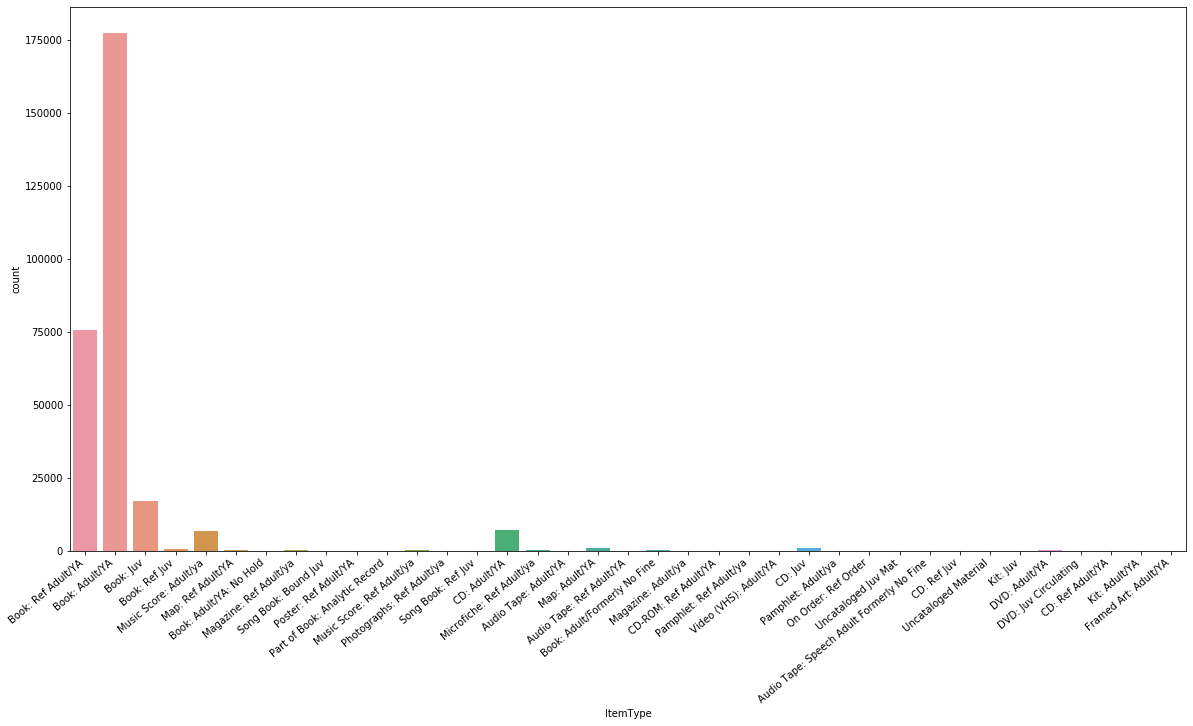

In [28]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='ItemType', data = clean_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [29]:
ref_data = clean_data.loc[clean_data['ItemType'] == 'Book: Ref Adult/YA']
ref_data.head()

,Title,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemCount,Checked_out
0,Erotic art of the East; the sexual theme in or...,"Rawson, Philip S.",1968,"Putnam,","Erotic art East Asia, Art Asian",Book: Ref Adult/YA,CS 8 - Reference,2,0.0
2,Combat aircraft of the world; from 1909 to the...,"Taylor, John W. R. (John William Ransom), 1922...",1969,Putnam,Airplanes Military,Book: Ref Adult/YA,CA7-AERO Reference,2,0.0
3,Stained glass in French cathedrals. [Translate...,"Witzleben, Elisabeth von, 1905-",1968,Reynal,Glass painting and staining France,Book: Ref Adult/YA,CS 8 - Reference,2,0.0
7,"Tectonic, plutonic, and metamorphic history of...","Crosby, Percy.",1968,"Geological Society of America,",Geology British Columbia Kootenay Lake Region,Book: Ref Adult/YA,CS 7 - Ref,2,0.0
11,Ernst Ludwig Kirchner [by] Donald E. Gordon.,"Gordon, Donald E.",1968,"Harvard University Press,",Kirchner Ernst Ludwig 1880 1938,Book: Ref Adult/YA,CS 8 - Reference,2,0.0


In [30]:
ref_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75632 entries, 0 to 657213
Data columns (total 9 columns):
Title              75632 non-null object
Author             75632 non-null object
PublicationYear    75632 non-null int16
Publisher          75632 non-null object
Subjects           75632 non-null object
ItemType           75632 non-null object
ItemCollection     75632 non-null object
ItemCount          75632 non-null int64
Checked_out        75632 non-null float64
dtypes: float64(1), int16(1), int64(1), object(6)
memory usage: 5.3+ MB


In [31]:
adultbook_data = clean_data.loc[clean_data['ItemType'] == 'Book: Adult/YA']
adultbook_data.head()

,Title,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemCount,Checked_out
1,"Birdless summer; China: autobiography, history.","Han, Suyin, 1917-2012",1968,"Putnam,","Han Suyin 1917 2012, Authors Chinese 20th cent...",Book: Adult/YA,CA9-Biography,2,0.0
4,The history & folklore of American country tin...,"Coffin, Margaret",1968,T. Nelson,"Tinware United States, Tinsmiths United States...",Book: Adult/YA,CA-Nonfiction,2,0.0
5,Sulphides; the art of cameo incrustation.,"Jokelson, Paul, 1905-2002",1968,Nelson,Sulphides Art,Book: Adult/YA,CA-Nonfiction,2,0.0
8,"The Roman villa in Britain, edited by A. L. F....","Rivet, A. L. F. (Albert Lionel Frederick), 1915-",1969,Praeger,"Pavements Mosaic Great Britain, Romans Great B...",Book: Adult/YA,CA-Nonfiction,2,0.0
9,Archaic Greek gems; schools and artists in the...,"Boardman, John, 1927-",1968,"Northwestern University Press,",Gems Greece,Book: Adult/YA,CA-Nonfiction,2,0.0


In [32]:
adultbook_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177451 entries, 1 to 657189
Data columns (total 9 columns):
Title              177451 non-null object
Author             177451 non-null object
PublicationYear    177451 non-null int16
Publisher          177451 non-null object
Subjects           177451 non-null object
ItemType           177451 non-null object
ItemCollection     177451 non-null object
ItemCount          177451 non-null int64
Checked_out        177451 non-null float64
dtypes: float64(1), int16(1), int64(1), object(6)
memory usage: 12.5+ MB


In [33]:
juvbook_data = clean_data.loc[clean_data['ItemType'] == 'Book: Juv']
juvbook_data.head()

,Title,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemCount,Checked_out
44,The Aeneid; a retelling for young people. Illu...,"Gerdes, Florence Marie.",1969,St. Martin's Press,"Virgil Aeneis Adaptations Juvenile fiction, Ep...",Book: Juv,CC-Children's Nonfiction,2,1.0
74,Principles of demography [by] Donald J. Bogue.,"Bogue, Donald J., 1918-2014.",1969,Wiley,Demography,Book: Juv,NC--Children's Readers,2,0.0
75,A guide to site and environmental planning [by...,"Rubenstein, Harvey M.",1969,Wiley,"Landscape architecture, Building sites Plannin...",Book: Juv,NC--Children's Readers,2,0.0
76,Prehistoric and primitive art [by] Luis Perico...,"Pericot García, Luis, 1899-1978",1968,H. N. Abrams,"Art Prehistoric, Art Primitive",Book: Juv,NC--Children's Readers,2,0.0
77,The first civilizations: the archaeology of th...,"Daniel, Glyn Edmund",1968,Crowell,Civilization Ancient,Book: Juv,CC-Children's Readers,2,0.0


In [34]:
juvbook_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16882 entries, 44 to 657072
Data columns (total 9 columns):
Title              16882 non-null object
Author             16882 non-null object
PublicationYear    16882 non-null int16
Publisher          16882 non-null object
Subjects           16882 non-null object
ItemType           16882 non-null object
ItemCollection     16882 non-null object
ItemCount          16882 non-null int64
Checked_out        16882 non-null float64
dtypes: float64(1), int16(1), int64(1), object(6)
memory usage: 1.2+ MB


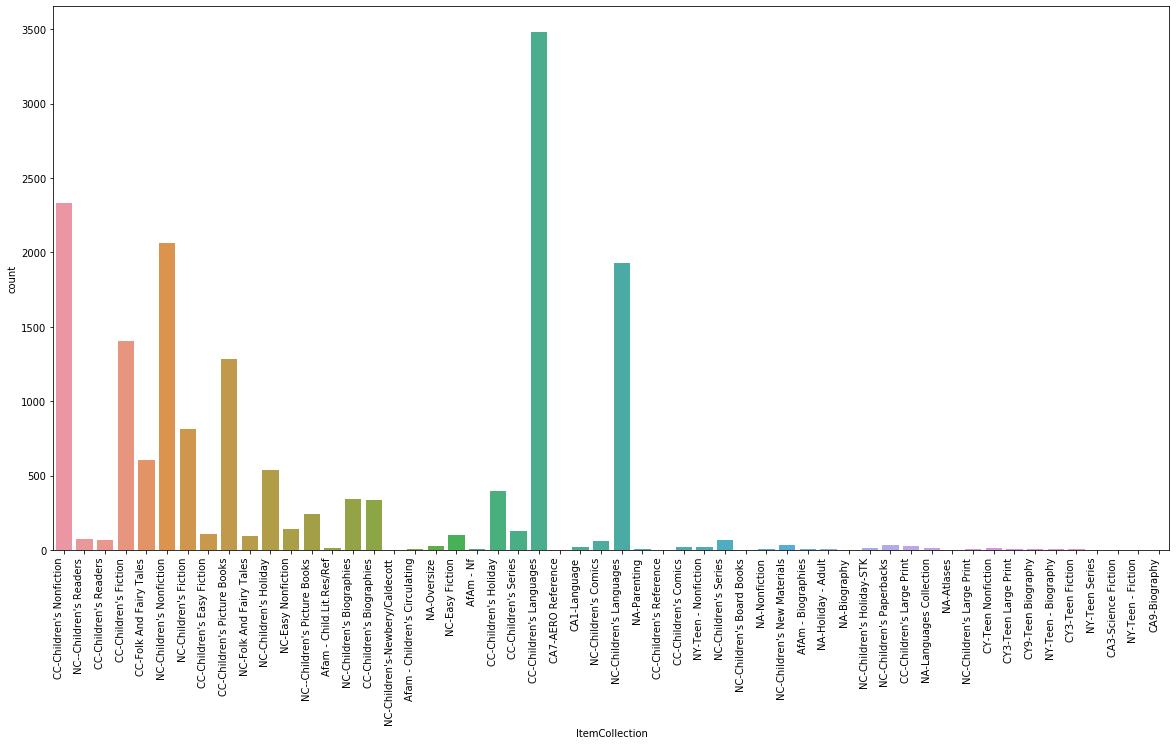

In [35]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='ItemCollection', data = juvbook_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

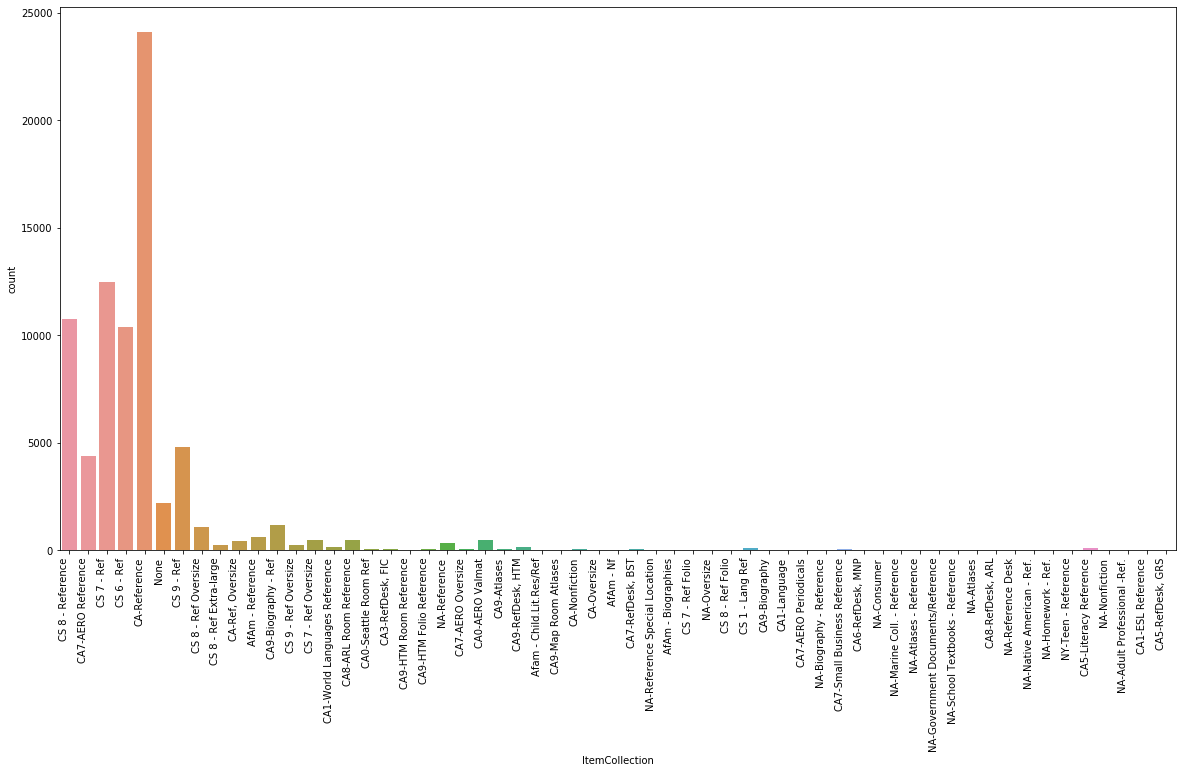

In [36]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='ItemCollection', data = ref_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

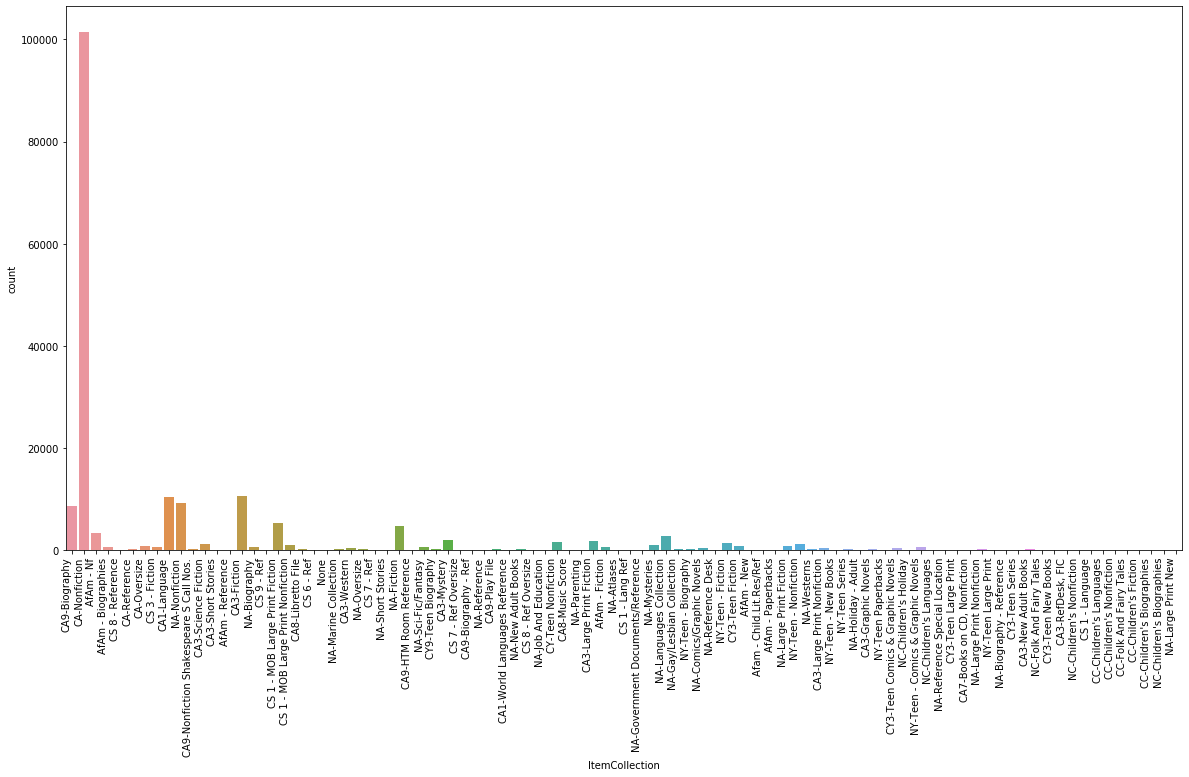

In [37]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='ItemCollection', data = adultbook_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

In [38]:
ref_data.groupby('PublicationYear').count()

,Title,Author,Publisher,Subjects,ItemType,ItemCollection,ItemCount,Checked_out
PublicationYear,,,,,,,,
1671,1,1,1,1,1,1,1,1
1672,1,1,1,1,1,1,1,1
1673,1,1,1,1,1,1,1,1
1675,1,1,1,1,1,1,1,1
1676,1,1,1,1,1,1,1,1
1696,1,1,1,1,1,1,1,1
1697,1,1,1,1,1,1,1,1
1718,1,1,1,1,1,1,1,1
1721,1,1,1,1,1,1,1,1


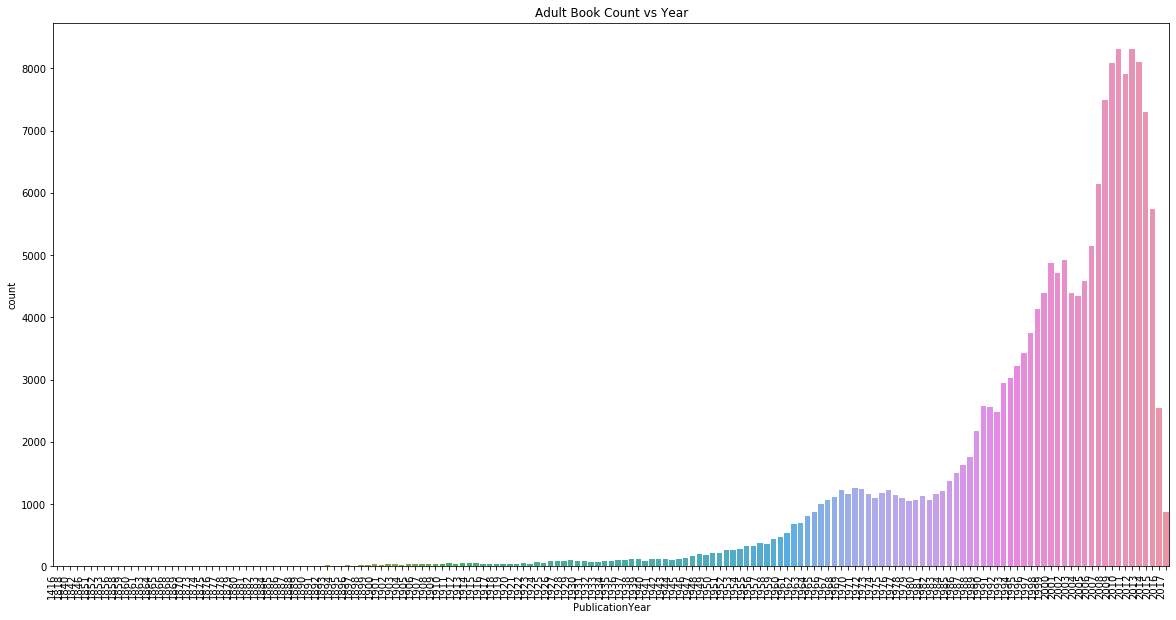

In [39]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='PublicationYear', data = adultbook_data)
plt.title("Adult Book Count vs Year")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

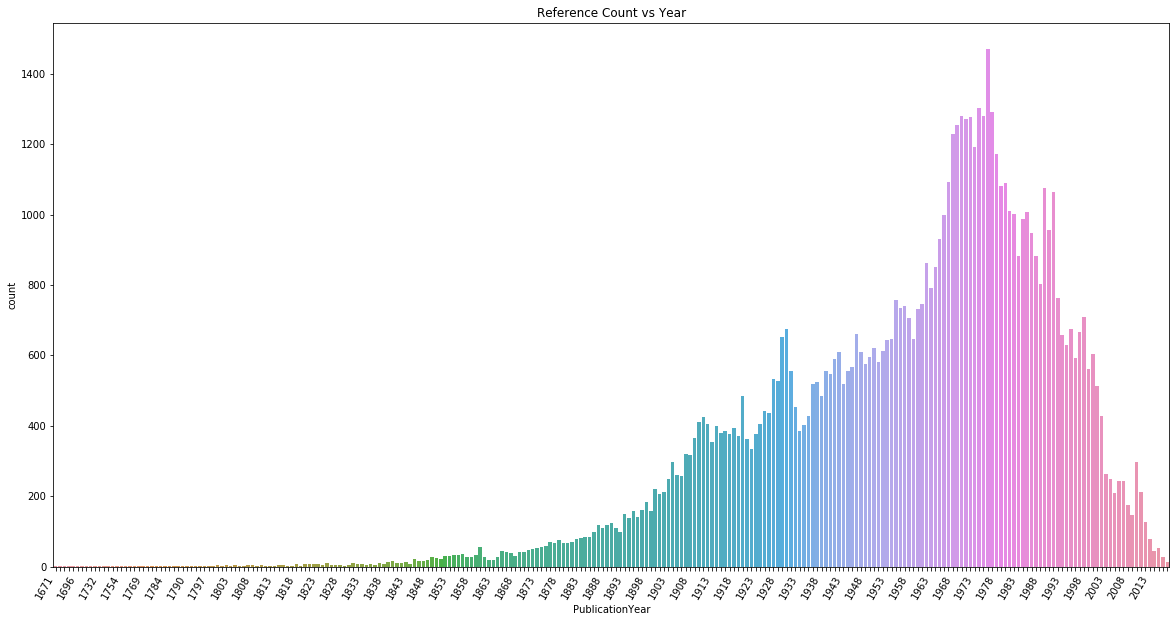

In [40]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='PublicationYear', data = ref_data)
plt.title("Reference Count vs Year")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.show()

In [41]:
juvbook_data.reset_index(drop=True)

,Title,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemCount,Checked_out
0,The Aeneid; a retelling for young people. Illu...,"Gerdes, Florence Marie.",1969,St. Martin's Press,"Virgil Aeneis Adaptations Juvenile fiction, Ep...",Book: Juv,CC-Children's Nonfiction,2,1.0
1,Principles of demography [by] Donald J. Bogue.,"Bogue, Donald J., 1918-2014.",1969,Wiley,Demography,Book: Juv,NC--Children's Readers,2,0.0
2,A guide to site and environmental planning [by...,"Rubenstein, Harvey M.",1969,Wiley,"Landscape architecture, Building sites Plannin...",Book: Juv,NC--Children's Readers,2,0.0
3,Prehistoric and primitive art [by] Luis Perico...,"Pericot García, Luis, 1899-1978",1968,H. N. Abrams,"Art Prehistoric, Art Primitive",Book: Juv,NC--Children's Readers,2,0.0
4,The first civilizations: the archaeology of th...,"Daniel, Glyn Edmund",1968,Crowell,Civilization Ancient,Book: Juv,CC-Children's Readers,2,0.0
5,The treasure fleets of the Spanish Main [by] R...,"Marx, Robert F., 1933-",1968,World Pub. Co.,"Spain Armada History, Merchant marine Spain Hi...",Book: Juv,CC-Children's Nonfiction,2,0.0
6,Paddington goes to town. Illus. by Peggy Fortnum.,"Bond, Michael",1968,"Houghton Mifflin,","Bears Juvenile fiction, Christmas Fiction",Book: Juv,CC-Children's Fiction,2,1.0
7,A history of body armor [by] Harold L. Peterso...,"Peterson, Harold L. (Harold Leslie), 1922-1978",1968,Scribner,Armor Juvenile literature,Book: Juv,CC-Children's Nonfiction,2,0.0
8,South American wonder tales. Illustrated by Ra...,"Carpenter, Frances, 1890-1972",1969,Follett Pub. Co.,"Folklore South America, Tales South America",Book: Juv,CC-Folk And Fairy Tales,2,0.0
9,By loch and by lin; tales from Scottish ballad...,"Leodhas, Sorche Nic, 1898-1969",1969,"Holt, Rinehart and Winston","Tales Scotland Juvenile fiction, Folklore Scot...",Book: Juv,CC-Folk And Fairy Tales,2,1.0


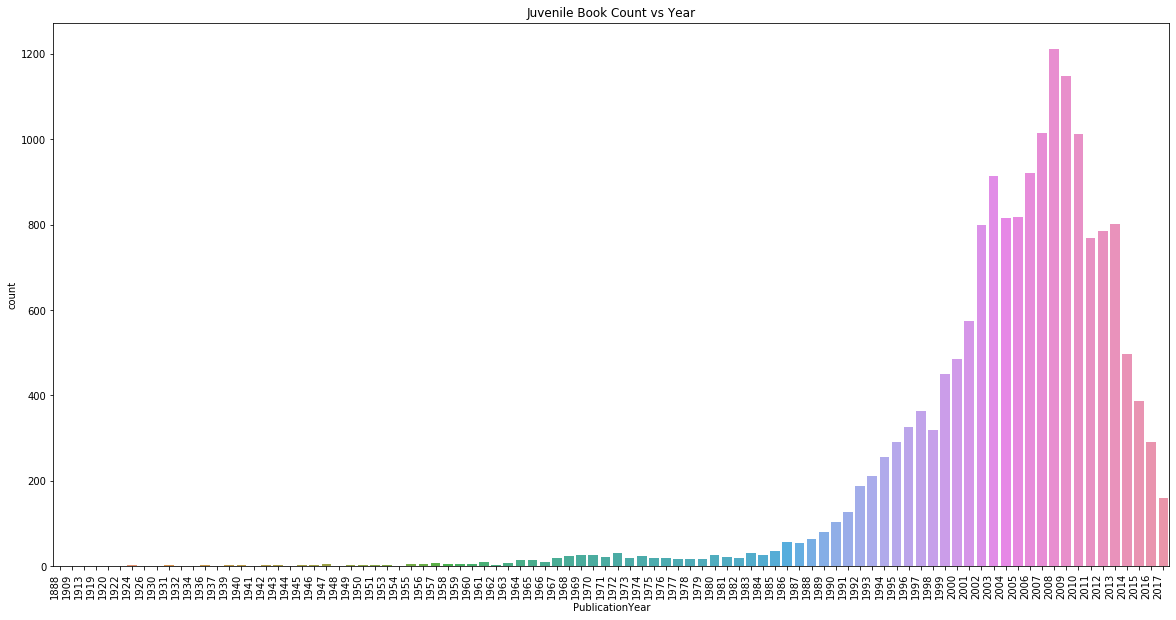

In [42]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='PublicationYear', data = juvbook_data)
plt.title("Juvenile Book Count vs Year")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

# Stats

Chi-square test: compare year and type of item

1. Hypothesis
Null Hypothesis (H0): Variables are independent.
Alternative Hypothesis (H1): Variables are not independent

2. Use alpha value of 0.05

3. dataset

In [43]:
juvbook_years = juvbook_data.groupby('PublicationYear').count()
juvbook_years.head()

,Title,Author,Publisher,Subjects,ItemType,ItemCollection,ItemCount,Checked_out
PublicationYear,,,,,,,,
1888,1,1,1,1,1,1,1,1
1909,1,1,1,1,1,1,1,1
1913,1,1,1,1,1,1,1,1
1919,1,1,1,1,1,1,1,1
1920,1,1,1,1,1,1,1,1


In [44]:
juvbook_years = juvbook_years.reset_index()
juvbook_years = juvbook_years[['PublicationYear', 'ItemCount']]
juvbook_years.tail()

,PublicationYear,ItemCount
87,2013,802
88,2014,498
89,2015,387
90,2016,290
91,2017,160


In [45]:
juvbook_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
PublicationYear    92 non-null int64
ItemCount          92 non-null int64
dtypes: int64(2)
memory usage: 1.5 KB


In [46]:
ref_years = ref_data.groupby('PublicationYear').count()
ref_years = ref_years.reset_index()
ref_years = ref_years[['PublicationYear', 'ItemCount']]

adult_years = adultbook_data.groupby('PublicationYear').count()
adult_years = adult_years.reset_index()
adult_years = adult_years[['PublicationYear', 'ItemCount']]

In [47]:
ref_years.head()

,PublicationYear,ItemCount
0,1671,1
1,1672,1
2,1673,1
3,1675,1
4,1676,1


In [48]:
adult_years.head()

,PublicationYear,ItemCount
0,1416,2
1,1818,1
2,1840,1
3,1842,2
4,1846,1


In [49]:
chi_data = pd.merge(adult_years, juvbook_years, on='PublicationYear', how='outer')
chi_data.head()

,PublicationYear,ItemCount_x,ItemCount_y
0,1416,2,NaN
1,1818,1,NaN
2,1840,1,NaN
3,1842,2,NaN
4,1846,1,NaN


In [50]:
chi_data = pd.merge(chi_data, ref_years, on='PublicationYear', how='outer')
chi_data = chi_data.sort_values(['PublicationYear'])
chi_data.head()

,PublicationYear,ItemCount_x,ItemCount_y,ItemCount
0,1416,2.0,NaN,NaN
165,1671,NaN,NaN,1.0
166,1672,NaN,NaN,1.0
167,1673,NaN,NaN,1.0
168,1675,NaN,NaN,1.0


In [51]:
chi_data = chi_data.fillna(0)

In [52]:
chi_data = chi_data.rename(columns={'ItemCount_x':'Adult Books', 'ItemCount_y':'Juvenile Books', 'ItemCount':'Reference Books'})
chi_data.head()

,PublicationYear,Adult Books,Juvenile Books,Reference Books
0,1416,2.0,0.0,0.0
165,1671,0.0,0.0,1.0
166,1672,0.0,0.0,1.0
167,1673,0.0,0.0,1.0
168,1675,0.0,0.0,1.0


In [53]:
chi_data = chi_data.set_index('PublicationYear')

In [73]:
chi_data.T

PublicationYear,1416,1671,1672,1673,1675,1676,1696,1697,1718,1721,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Adult Books,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7489.0,8089.0,8319.0,7912.0,8305.0,8109.0,7296.0,5744.0,2549.0,876.0
Juvenile Books,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1212.0,1147.0,1012.0,768.0,784.0,802.0,498.0,387.0,290.0,160.0
Reference Books,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,175.0,147.0,298.0,213.0,126.0,80.0,46.0,54.0,27.0,12.0


In [55]:
from scipy.stats import chi2_contingency
alpha = 0.05
stat, p, dof, expected = chi2_contingency(chi_data.values)
print(stat, p, dof)

119541.4409103959 0.0 510


chi-squared value: 119541.4409103959

p-value: 0

degree of freedom: 510

In [56]:
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.050, p=0.000
Variables are associated (reject H0)


Interesting things to note:
Chi-squared value is very large due to the larger table size. With a p-value of 0 (most likely not exactly 0 but an extremely low number)

# ML Models


In [57]:
clean_data.head()

,Title,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemCount,Checked_out
0,Erotic art of the East; the sexual theme in or...,"Rawson, Philip S.",1968,"Putnam,","Erotic art East Asia, Art Asian",Book: Ref Adult/YA,CS 8 - Reference,2,0.0
1,"Birdless summer; China: autobiography, history.","Han, Suyin, 1917-2012",1968,"Putnam,","Han Suyin 1917 2012, Authors Chinese 20th cent...",Book: Adult/YA,CA9-Biography,2,0.0
2,Combat aircraft of the world; from 1909 to the...,"Taylor, John W. R. (John William Ransom), 1922...",1969,Putnam,Airplanes Military,Book: Ref Adult/YA,CA7-AERO Reference,2,0.0
3,Stained glass in French cathedrals. [Translate...,"Witzleben, Elisabeth von, 1905-",1968,Reynal,Glass painting and staining France,Book: Ref Adult/YA,CS 8 - Reference,2,0.0
4,The history & folklore of American country tin...,"Coffin, Margaret",1968,T. Nelson,"Tinware United States, Tinsmiths United States...",Book: Adult/YA,CA-Nonfiction,2,0.0


In [58]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286725 entries, 0 to 657213
Data columns (total 9 columns):
Title              286725 non-null object
Author             286725 non-null object
PublicationYear    286725 non-null int16
Publisher          286725 non-null object
Subjects           286725 non-null object
ItemType           286725 non-null object
ItemCollection     286725 non-null object
ItemCount          286725 non-null int64
Checked_out        286725 non-null float64
dtypes: float64(1), int16(1), int64(1), object(6)
memory usage: 30.2+ MB


## Feature Importance - Random Forests

In [59]:
modelled_data = clean_data.drop(['Title','Author','Publisher','Subjects'], axis=1)
modelled_data = modelled_data.drop_duplicates().reset_index(drop = True)
modelled_data.head()

,PublicationYear,ItemType,ItemCollection,ItemCount,Checked_out
0,1968,Book: Ref Adult/YA,CS 8 - Reference,2,0.0
1,1968,Book: Adult/YA,CA9-Biography,2,0.0
2,1969,Book: Ref Adult/YA,CA7-AERO Reference,2,0.0
3,1968,Book: Adult/YA,CA-Nonfiction,2,0.0
4,1968,Book: Ref Adult/YA,CS 7 - Ref,2,0.0


In [60]:
from sklearn.model_selection import train_test_split

dummied_data = pd.get_dummies(modelled_data, columns=['ItemType', 'ItemCollection'], drop_first=True)
y = modelled_data['Checked_out']
X = dummied_data.drop(columns = ['Checked_out'])
feature_list = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14555, 201) (14555,)
(3639, 201) (3639,)


In [61]:
X_train.head()

,PublicationYear,ItemCount,ItemType_Audio Tape: Ref Adult/YA,ItemType_Audio Tape: Speech Adult Formerly No Fine,ItemType_Book: Adult/Formerly No Fine,ItemType_Book: Adult/YA,ItemType_Book: Adult/YA: No Hold,ItemType_Book: Juv,ItemType_Book: Ref Adult/YA,ItemType_Book: Ref Juv,...,ItemCollection_NY-Teen - Books on CD,ItemCollection_NY-Teen - Comics & Graphic Novels,ItemCollection_NY-Teen - Fiction,ItemCollection_NY-Teen - New Books,ItemCollection_NY-Teen - Nonfiction,ItemCollection_NY-Teen - Reference,ItemCollection_NY-Teen Large Print,ItemCollection_NY-Teen Paperbacks,ItemCollection_NY-Teen Series,ItemCollection_None
16318,2013,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2670,1889,4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5386,1844,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12719,2006,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12812,2006,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state = 42)

#train model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [63]:
predictions = rf.predict(X_test)

#calculate absolute errors
errors = abs(predictions - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2), 'degrees.')
print(predictions)

Mean absolute error:  0.43 degrees.
[0.38333333 0.925      0.         ... 0.         0.6        0.4       ]


In [64]:
#calculate mean absolute percentage error
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  -inf %.


In [65]:
importances = list(rf.feature_importances_)

feature_importances = [ (feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: PublicationYear      Importance: 0.37633
Variable: ItemType_Book: Ref Adult/YA Importance: 0.17513
Variable: ItemCount            Importance: 0.09484
Variable: ItemCollection_CA-Nonfiction Importance: 0.0104
Variable: ItemCollection_CA-Reference Importance: 0.00979
Variable: ItemCollection_NA-Nonfiction Importance: 0.00822
Variable: ItemCollection_CA1-Language Importance: 0.00811
Variable: ItemCollection_CA3-Fiction Importance: 0.00734
Variable: ItemCollection_AfAm - Nf Importance: 0.00717
Variable: ItemType_Book: Adult/YA Importance: 0.00693
Variable: ItemCollection_CA9-Biography Importance: 0.00686
Variable: ItemCollection_NA-Fiction Importance: 0.00667
Variable: ItemCollection_NA-Languages Collection Importance: 0.00643
Variable: ItemType_Book: Juv   Importance: 0.0063
Variable: ItemCollection_NC-Children's Languages Importance: 0.0058
Variable: ItemCollection_CS 1 - MOB Large Print Fiction Importance: 0.00565
Variable: ItemCollection_NC-Children's Nonfiction Importance: 0

## Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#reuse X y data from before
y = modelled_data['Checked_out']
X = dummied_data.drop(columns = ['Checked_out'])
feature_list = list(X.columns)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5221214619400935


## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2289,  222],
       [ 908,  220]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

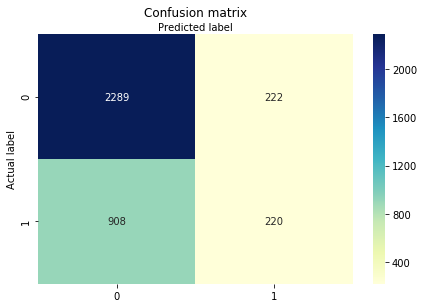

In [70]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6894751305303655
Precision: 0.497737556561086
Recall: 0.1950354609929078


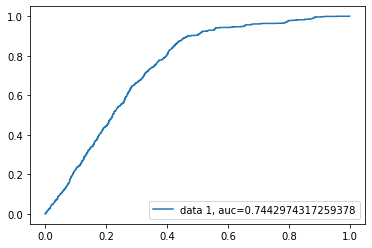

In [72]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()